- Scatter plots are used for quantitative variable vs quantitative variable
- Violin plots for quantitative variable vs qualitative variablec
- clustered bar chart for qualitative variable vs qualitative variable

# Scatter plots and correlation (Pearson Correlation Coefficient)

Pearson correlation coefficient is a statistic quantifying the strength of linear correlation between 2 numeric variables

Important note: Sometimes the linarity appears when we transofrm one of the feature vector (e.g. log(y) when y increases exponentially)

If we want to inspect the relationship between two numeric variables, the standard choice of plot is the scatterplot. In a scatterplot, each data point is plotted individually as a point, its x-position corresponding to one feature value and its y-position corresponding to the second.

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb

%matplotlib inline

In [11]:
fuel_econ = pd.read_csv('fuel-econ.csv')
fuel_econ.head(3)

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5


Text(0, 0.5, 'Combined Fuel Eff. (mpg)')

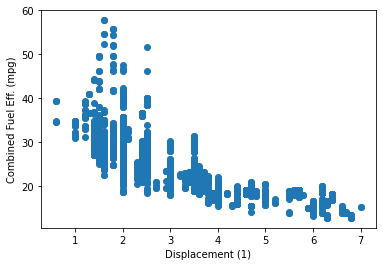

In [12]:
plt.scatter(data = fuel_econ, x= 'displ', y='comb')
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)')

In the example above, the relationship between the two variables is negative because as higher values of the x-axis variable are increasing, the values of the variable plotted on the y-axis are decreasing.

Alternative Approach - seaborn.regplot()
Seaborn's regplot() function combines scatterplot creation with regression function fitting:


Text(0, 0.5, 'Combined Fuel Eff. (mpg)')

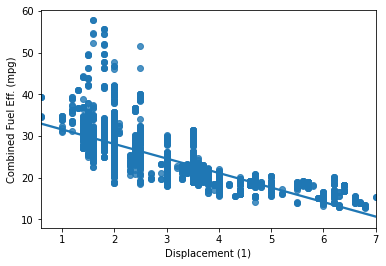

In [16]:
sb.regplot(data=fuel_econ, x = 'displ', y='comb')
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)')

The regression line in a scatter plot showing a negative correlation between the two variables.

Text(0, 0.5, 'Combined Fuel Eff. (mpg)')

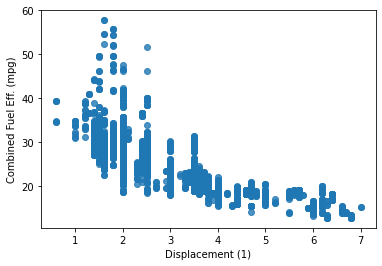

In [19]:
#removing the regression line
sb.regplot(data=fuel_econ, x = 'displ', y='comb', fit_reg=False)
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)')

## Example 3. Plot the regression line on the transformed data


In [20]:
def log_trans(x, inverse = False):
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)

/home/hhalim/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


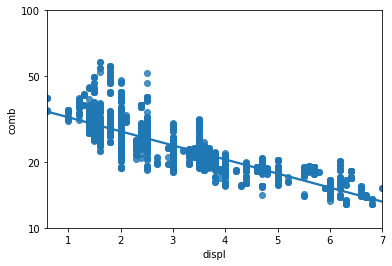

In [21]:
sb.regplot(fuel_econ['displ'], fuel_econ['comb'].apply(log_trans))
tick_locs = [10, 20, 50, 100]
plt.yticks(log_trans(tick_locs), tick_locs);

## Overplotting, Transparency, and Jitter


If we have a very large number of points to plot or our numeric variables are discrete-valued, then it is possible that using a scatterplot straightforwardly will not be informative. The visualization will suffer from overplotting, where the high amount of overlap in points makes it difficult to see the actual relationship between the plotted variables.

Let's see an example below for each Jitter to move the position of each point slightly from its true value. Jitter is not a direct option in matplotlib's scatter() function, but is a built-in option with seaborn's regplot() function. The x- and y- jitter can be added independently, and won't affect the fit of any regression function, if made.

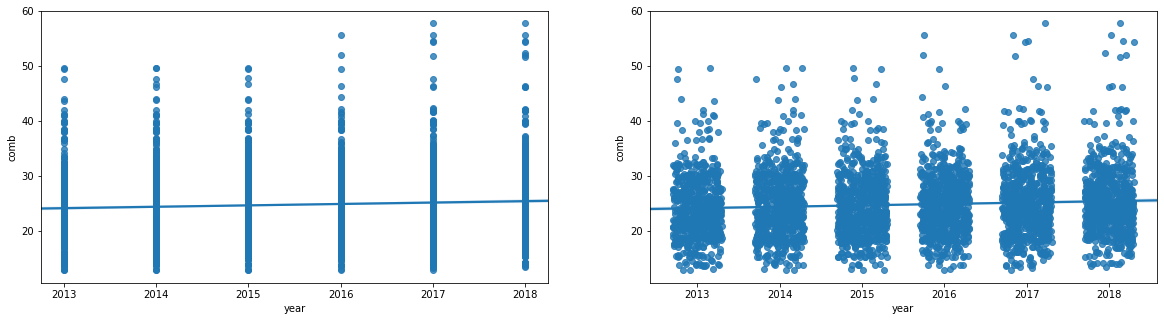

In [22]:
plt.figure(figsize = [20, 5])

# PLOT ON LEFT - SIMPLE SCATTER
plt.subplot(1, 2, 1)
sb.regplot(data = fuel_econ, x = 'year', y = 'comb', truncate=False);

##########################################
# PLOT ON RIGHT - SCATTER PLOT WITH JITTER
plt.subplot(1, 2, 2)

# In the sb.regplot() function below, the `truncate` argument accepts a boolean.
# If truncate=True, the regression line is bounded by the data limits. 
# Else if truncate=False, it extends to the x axis limits.
# The x_jitter will make each x value will be adjusted randomly by +/-0.3
sb.regplot(data = fuel_econ, x = 'year', y = 'comb', truncate=False, x_jitter=0.3);


The scatter plot on left showing a simple scatter plot, while the right one presents with jitter.

In the left scatter plot above, the degree of variability in the data and strength of relationship are fairly unclear. In cases like this, we may want to employ transparency and jitter to make the scatterplot more informative. The right scatter plot has a jitter introduced to the data points.

You can add transparency to either scatter() or regplot() by adding the "alpha" parameter set to a value between 0 (fully transparent, not visible) and 1 (fully opaque). See the example below.

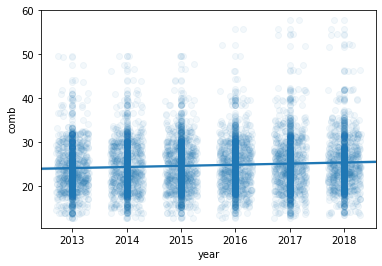

In [23]:
# The scatter_kws helps specifying the opaqueness of the data points. 
# The alpha take a value between [0-1], where 0 represents transparent, and 1 is opaque. 
sb.regplot(data = fuel_econ, x = 'year', y = 'comb', truncate=False, x_jitter=0.3, scatter_kws={'alpha':1/20});

# Alternative way to plot with the transparency.
# The scatter() function below does NOT have any argument to specify the Jitter
plt.scatter(data = fuel_econ, x = 'year', y = 'comb', alpha=1/20);

In the plot above, the jitter settings will cause each point to be plotted in a uniform ±0.3 range of their true values. Note that transparency has been changed to be a dictionary assigned to the "scatter_kws" parameter.

### Heat Maps

A heat map is a 2-d version of the histogram that can be used as an alternative to a scatterplot. Like a scatterplot, the values of the two numeric variables to be plotted are placed on the plot axes. Similar to a histogram, the plotting area is divided into a grid and the number of points in each grid rectangle is added up. Since there won't be room for bar heights, counts are indicated instead by grid cell color. A heat map can be implemented with Matplotlib's hist2d() function.

Heat maps are useful in the following cases:

- To represent a plot for discrete vs. another discrete variable
- As an alternative to transparency when the data points are enormous

Text(0, 0.5, 'Combined Fuel Eff. (mpg)')

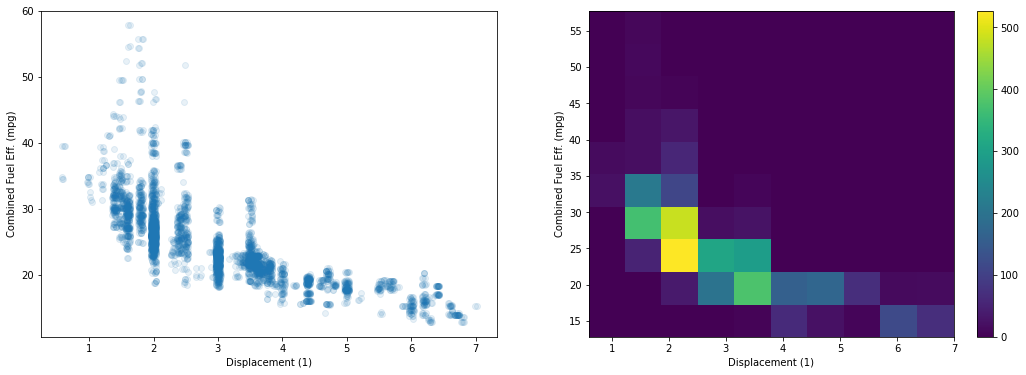

In [31]:
plt.figure(figsize =[18, 6])
plt.subplot(1, 2, 1)
sb.regplot(data = fuel_econ, x= 'displ', y='comb', x_jitter=0.04, scatter_kws={'alpha': 1/10}, fit_reg = False)
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)')

#note matplotlib does not have jitters, or kws

plt.subplot(1, 2, 2)
plt.hist2d(data = fuel_econ, x= 'displ', y='comb')
plt.colorbar()
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)')

In the example above, we added a colorbar() function call to add a colorbar to the side of the plot, showing the mapping from counts to colors.

#### Additional Variations


To select a different color palette, you can set the "cmap" parameter in hist2d. The most convenient way of doing this is to set the "cmap" value as a string referencing a built-in Matplotlib palette. A list of valid strings can be found on this part of the Pyplot API documentation. A further discussion of color in plots will be left to the next lesson. For now, I will just show an example of reversing the default "viridis" color palette, by setting cmap = 'viridis_r'.

Furthermore, I would like to distinguish cells with zero counts from those with non-zero counts. The "cmin" parameter specifies the minimum value in a cell before it will be plotted. By adding a cmin = 0.5 parameter to the hist2d call, this means that a cell will only get colored if it contains at least one point.

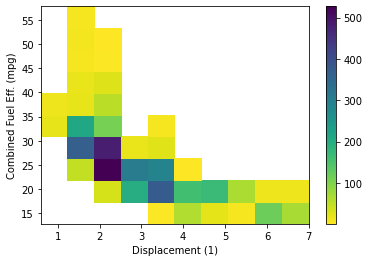

In [32]:
# Use cmin to set a minimum bound of counts 
# Use cmap to reverse the color map. 
plt.hist2d(data = fuel_econ, x = 'displ', y = 'comb', cmin=0.5, cmap='viridis_r')
plt.colorbar()
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

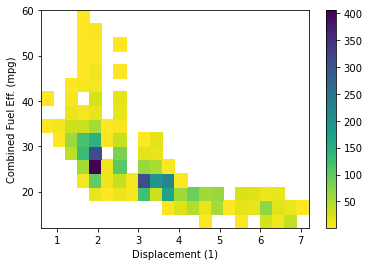

In [33]:
# Specify bin edges 
bins_x = np.arange(0.6, 7+0.3, 0.3)
bins_y = np.arange(12, 58+3, 3)

plt.hist2d(data = fuel_econ, x = 'displ', y = 'comb', cmin=0.5, cmap='viridis_r', bins = [bins_x, bins_y])
plt.colorbar()
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

# Notice the areas of high frequency in the middle of the negative trend in the plot.


Notice that since we have two variables, the "bins" parameter takes a list of two bin edge specifications, one for each dimension. Choosing an appropriate bin size is just as important here as it was for the univariate histogram.

Annotations on each cell
If you have a lot of data, you might want to add annotations to cells in the plot indicating the count of points in each cell. From hist2d, this requires the addition of text elements one by one, much like how text annotations were added one by one to the bar plots in the previous lesson. We can get the counts to annotate directly from what is returned by hist2d, which includes not just the plotting object, but an array of counts and two vectors of bin edges.

Example 4. Add text annotation on each cell using pyplot.text() function

In [37]:
fuel_econ.displ.describe()

count    3929.000000
mean        2.950573
std         1.305901
min         0.600000
25%         2.000000
50%         2.500000
75%         3.600000
max         7.000000
Name: displ, dtype: float64

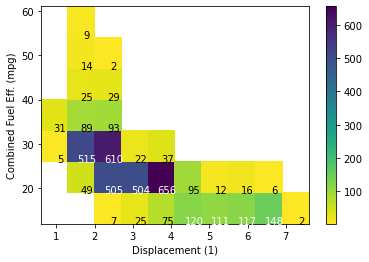

In [35]:
# Specify bin edges (we deduced these edges by calling describe of the data fram)
bins_x = np.arange(0.6, 7+0.7, 0.7)
bins_y = np.arange(12, 58+7, 7)
# Use cmin to set a minimum bound of counts 
# Use cmap to reverse the color map. 
h2d = plt.hist2d(data = fuel_econ, x = 'displ', y = 'comb', cmin=0.5, cmap='viridis_r', bins = [bins_x, bins_y])

plt.colorbar()
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

# Select the bi-dimensional histogram, a 2D array of samples x and y. 
# Values in x are histogrammed along the first dimension and 
# values in y are histogrammed along the second dimension.
counts = h2d[0]

# Add text annotation on each cell
# Loop through the cell counts and add text annotations for each
for i in range(counts.shape[0]):
    for j in range(counts.shape[1]):
        c = counts[i,j]
        if c >= 100: # increase visibility on darker cells
            plt.text(bins_x[i]+0.5, bins_y[j]+0.5, int(c),
                     ha = 'center', va = 'center', color = 'white')
        elif c > 0:
            plt.text(bins_x[i]+0.5, bins_y[j]+0.5, int(c),
                     ha = 'center', va = 'center', color = 'black')

If you have too many cells in your heat map, then the annotations will end up being too overwhelming, too much to attend to. In cases like that, it's best to leave off the annotations and let the data and colorbar speak for themselves.

You're more likely to see annotations in a categorical heat map, where there are going to be fewer cells plotted. Indeed, there is a parameter built into seaborn's heatmap() function that is built for categorical heatmaps, as will be seen later.